In [1]:
import math
from scipy.spatial.distance import euclidean
from pandas import read_csv
import seaborn as sns
import pandas as pd
#Agrego numpy
import numpy as np

In [2]:
from pandas import read_csv
data_url = 'https://gist.githubusercontent.com/jackbandy/5cd988ab5c3d95b79219364dce7ee5ae/raw/731ecdbecc7b33030f23cd919e6067dfbaf42feb/song-ratings.csv'
ratings = read_csv(data_url,index_col=0)

In [3]:
from IPython.display import display, HTML
display(HTML(ratings.to_html()))

,One Dance (Drake),Lean On (Major Lazer),Sunflower (Post Malone and Swae Lee),Somebody That I Used To Know (Gotye),Rolling in the Deep (Adele),Can't Hold Us (Macklemore),7 Rings (Ariana Grande),Wake Me Up (Avicii),Love The Way You Lie (Eminem and Rihanna),bad guy (Billie Eilish),Rather Be (Clean Bandit and Jess Glynne),Call Me Maybe (Carly Rae Jepsen),We Are Young (fun.),Shape of You (Ed Sheeran),Closer (The Chainsmokers),Cheerleader (OMI),Radioactive (Imagine Dragons),Señorita (Shawn Mendes and Camila Cabello),Airplanes (B.o.B and Hayley Williams),Want (Birdtalker),Without You (David Guetta and Usher),Half Love (Red Hearse),Old Town Road - Remix (Lil Nas X and Billy Ray Cyrus),Never Really Over (Katy Perry)
First Name (or Alias),,,,,,,,,,,,,,,,,,,,,,,,
Jack,3.0,5.0,5.0,2,4,4,NaN,5.0,2.0,4.0,5.0,5,4.0,2,5.0,2.0,5,2.0,2.0,5.0,5.0,4.0,5,5
Nick,2.0,5.0,5.0,4,5,3,5.0,2.0,3.0,5.0,4.0,5,5.0,1,1.0,2.0,2,3.0,3.0,4.0,3.0,4.0,2,5
Jubilee,5.0,4.0,2.0,3,3,5,4.0,3.0,2.0,5.0,5.0,2,4.0,1,3.0,2.0,5,1.0,5.0,1.0,1.0,1.0,4,5
Jules,5.0,5.0,3.0,3,5,4,3.0,4.0,3.0,5.0,3.0,3,3.0,3,4.0,2.0,3,2.0,3.0,NaN,4.0,NaN,1,5
Trevor,4.0,3.0,2.0,4,3,1,3.0,4.0,3.0,2.0,NaN,1,3.0,4,4.0,1.0,5,4.0,3.0,NaN,NaN,NaN,1,3
Megan,5.0,4.0,4.0,3,3,3,3.0,5.0,4.0,5.0,5.0,4,3.0,4,3.0,2.0,5,3.0,3.0,3.0,4.0,NaN,2,5
Joe,3.0,4.0,5.0,4,5,4,3.0,4.0,3.0,4.0,3.0,4,4.0,4,2.0,4.0,3,3.0,4.0,4.0,3.0,4.0,5,3
Hallie,NaN,NaN,NaN,3,5,3,NaN,NaN,NaN,NaN,NaN,3,NaN,5,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,2,4


In [4]:
#Exploracion de datos general mediante las medidas de tendencia central
ratings.describe().round(2)

,One Dance (Drake),Lean On (Major Lazer),Sunflower (Post Malone and Swae Lee),Somebody That I Used To Know (Gotye),Rolling in the Deep (Adele),Can't Hold Us (Macklemore),7 Rings (Ariana Grande),Wake Me Up (Avicii),Love The Way You Lie (Eminem and Rihanna),bad guy (Billie Eilish),...,Closer (The Chainsmokers),Cheerleader (OMI),Radioactive (Imagine Dragons),Señorita (Shawn Mendes and Camila Cabello),Airplanes (B.o.B and Hayley Williams),Want (Birdtalker),Without You (David Guetta and Usher),Half Love (Red Hearse),Old Town Road - Remix (Lil Nas X and Billy Ray Cyrus),Never Really Over (Katy Perry)
count,7.00,7.00,7.00,8.00,8.00,8.00,6.00,7.00,7.00,7.00,...,7.00,7.00,8.0,7.00,7.00,5.00,6.00,4.00,8.00,8.00
mean,3.86,4.29,3.71,3.25,4.12,3.38,3.50,3.86,2.86,4.29,...,3.14,2.14,4.0,2.57,3.29,3.40,3.33,3.25,2.75,4.38
std,1.21,0.76,1.38,0.71,0.99,1.19,0.84,1.07,0.69,1.11,...,1.35,0.90,1.2,0.98,0.95,1.52,1.37,1.50,1.67,0.92
min,2.00,3.00,2.00,2.00,3.00,1.00,3.00,2.00,2.00,2.00,...,1.00,1.00,2.0,1.00,2.00,1.00,1.00,1.00,1.00,3.00
25%,3.00,4.00,2.50,3.00,3.00,3.00,3.00,3.50,2.50,4.00,...,2.50,2.00,3.0,2.00,3.00,3.00,3.00,3.25,1.75,3.75
50%,4.00,4.00,4.00,3.00,4.50,3.50,3.00,4.00,3.00,5.00,...,3.00,2.00,4.5,3.00,3.00,4.00,3.50,4.00,2.00,5.00
75%,5.00,5.00,5.00,4.00,5.00,4.00,3.75,4.50,3.00,5.00,...,4.00,2.00,5.0,3.00,3.50,4.00,4.00,4.00,4.25,5.00
max,5.00,5.00,5.00,4.00,5.00,5.00,5.00,5.00,4.00,5.00,...,5.00,4.00,5.0,4.00,5.00,5.00,5.00,4.00,5.00,5.00


### Tratamiento de nulos
Debemos reemplazar los valores nulos ya que el metodo de distancia euclidea no soporta valores nulos, los reemplazamos por valores -1

In [5]:
#Descubrir cuantos valores nulos hay, con el fin de proceder a limpiarlos
ratings.isnull().sum()

One Dance (Drake)                                        1
Lean On (Major Lazer)                                    1
Sunflower (Post Malone and Swae Lee)                     1
Somebody That I Used To Know (Gotye)                     0
Rolling in the Deep (Adele)                              0
Can't Hold Us (Macklemore)                               0
7 Rings (Ariana Grande)                                  2
Wake Me Up (Avicii)                                      1
Love The Way You Lie (Eminem and Rihanna)                1
bad guy (Billie Eilish)                                  1
Rather Be (Clean Bandit and Jess Glynne)                 2
Call Me Maybe (Carly Rae Jepsen)                         0
We Are Young (fun.)                                      1
Shape of You (Ed Sheeran)                                0
Closer (The Chainsmokers)                                1
Cheerleader (OMI)                                        1
Radioactive (Imagine Dragons)                           

<AxesSubplot:ylabel='First Name (or Alias)'>

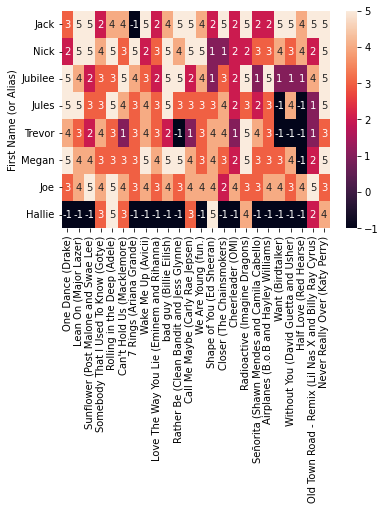

In [6]:
ratings=ratings.fillna(-1)
sns.heatmap(ratings, annot=True,)

#Opcional aplicar otro metodo de tratamiento de nulos
#Consideria a cmabiar solo en valor de -1 a cero pero seria indistinto hacerlo 

array([[<AxesSubplot:title={'center':'One Dance (Drake)'}>,
        <AxesSubplot:title={'center':'Lean On (Major Lazer)'}>,
        <AxesSubplot:title={'center':'Sunflower (Post Malone and Swae Lee)'}>,
        <AxesSubplot:title={'center':'Somebody That I Used To Know (Gotye)'}>,
        <AxesSubplot:title={'center':'Rolling in the Deep (Adele)'}>],
       [<AxesSubplot:title={'center':"Can't Hold Us (Macklemore)"}>,
        <AxesSubplot:title={'center':'7 Rings (Ariana Grande)'}>,
        <AxesSubplot:title={'center':'Wake Me Up (Avicii)'}>,
        <AxesSubplot:title={'center':'Love The Way You Lie (Eminem and Rihanna)'}>,
        <AxesSubplot:title={'center':'bad guy (Billie Eilish)'}>],
       [<AxesSubplot:title={'center':'Rather Be (Clean Bandit and Jess Glynne)'}>,
        <AxesSubplot:title={'center':'Call Me Maybe (Carly Rae Jepsen)'}>,
        <AxesSubplot:title={'center':'We Are Young (fun.)'}>,
        <AxesSubplot:title={'center':'Shape of You (Ed Sheeran)'}>,
        <Ax

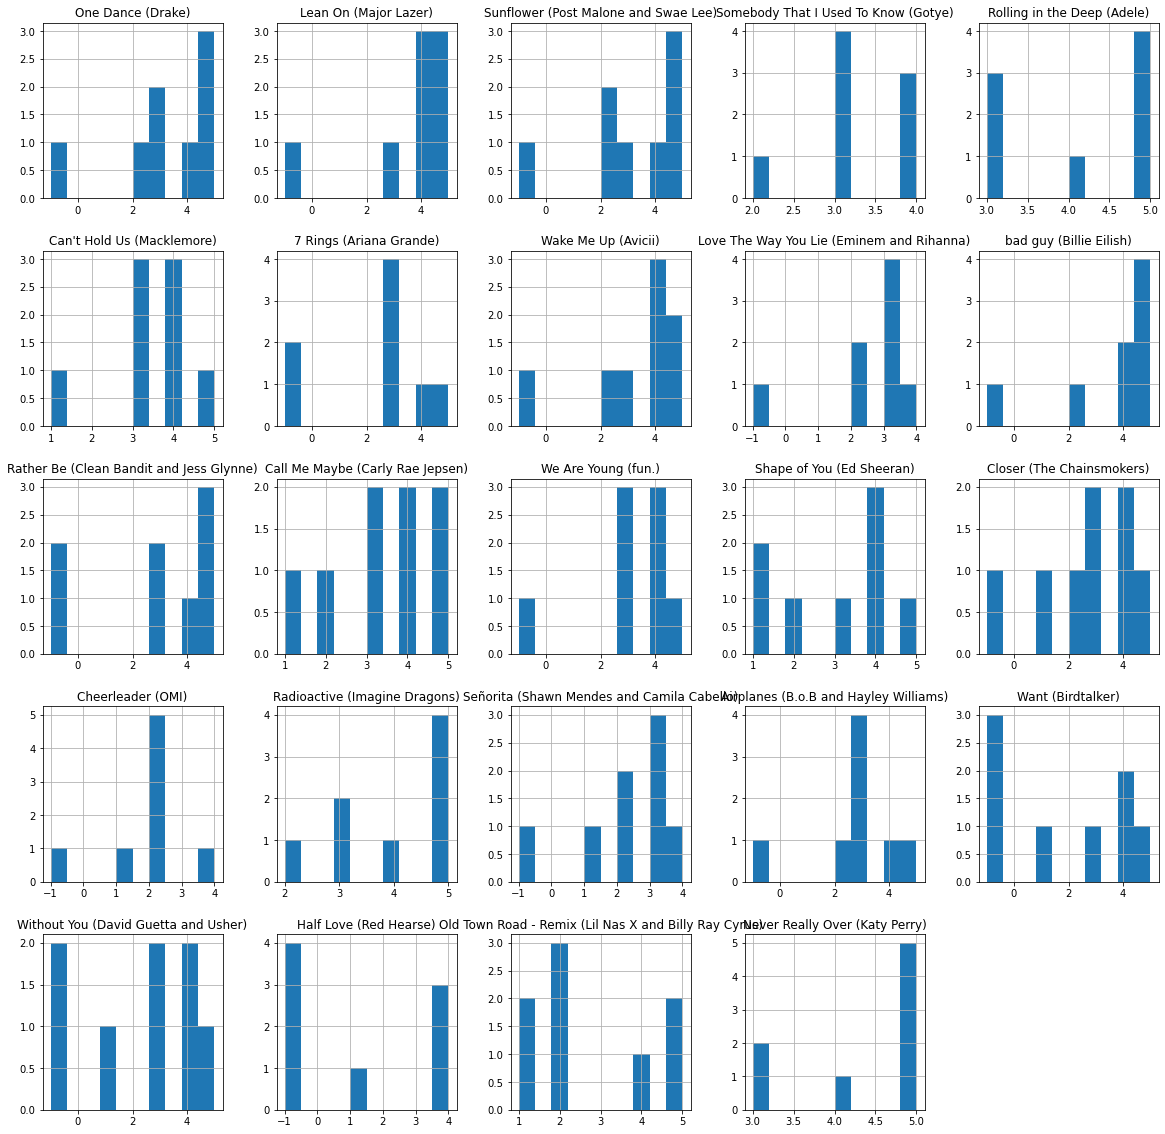

In [7]:
#Forma grafica de ver la relacion que cancion es mas popular graficamente o que cancion tiene mas valoraciones 
ratings.hist(figsize=(20,20))

### Definir funciones para calcular distancias
Existen diferentes metodos para calcular distancias entre elementos.

Resulta que el confiable teorema de Pitágoras se generaliza bastante bien. (La mayoría de los recomendadores usan otras métricas de distancia como la distancia del coseno, pero la ignoraremos en este tutorial). Si hay tres dimensiones, podemos llamarlas a, b y c, y luego simplemente sumarlas debajo de la raíz cuadrada: distancia = sqrt (a ^ 2 + b ^ 2 + c ^ 2). 
Y de hecho podemos hacer esto con cualquier número de dimensiones: distancia = sqrt (a ^ 2 + b ^ 2 + c ^ 2 + d ^ 2 + ... + n ^ 2).


#### Definir cualquier otra función para calcular similitud entre usuarios o items que consideren convieniente

In [8]:
#ignorar esta función es con fines didácticos
person1=np.array((1, 2, 3))
person2=np.array((1, 1, 1))
def euclideanDistance1(person1,person2):
  a_squared = (person1[0] - person2[0])**2
  b_squared = (person1[1] - person2[1])**2
  distance = math.sqrt(a_squared+b_squared)
  return distance
#Hay un error, no coincide el resultado anteriro con el siguinete y la funcion euclidiana de numpy

#Pueden utilizar esta función
def euclideanDistance(person1,person2):
  distance = euclidean(person1,person2)
  return distance


#Definir metodo que consideren conveniente, no es obligatorio, pueden reutilizar los metodos ya definidos.
np.linalg.norm(person1-person2)

2.23606797749979

### Sistema de Recomendacion de Filtrado Colaborativo User-User

Definir una función o varias que crean necesarios para encontrar la persona mas similar a otra recibida por parametro. Para ello la función debe realizar una comparación iterativa entre todos los usuarios, y retornar el usuario mas similar.

#### Definir metodo para calcular similitud entre personas

Desconozco como hacer el sistema colaborativo User-User, enteindo teoricamente que se debe de ver la destancia de todos los puntos, en etse caso las canciones de un usuario con los demas y cpn ello ver cual tiene menor distancia entre puntos, pero no logro aterrizar la idea de como hacerlo en python, vi su codigo en python con la master class pero no lofgre captar la idea,

In [9]:
#Definir función para calcular similitud entre personas
def most_similar_to(name):
    
#Definir función

  return closest_person

#### Definir función para obtener los items preferidos de un usuario

La función debe recibir un usuario o nombre de usuario por parametro, y devolver el o los items preferidos (puntuacion = 5)

In [10]:
#Definir función que devuelve el o los elementos preferidos de un usuario
def preferred_items(name):
    
# Definir función

    return preferred_items

#### Integrar las funciones definidas anteriormente

Integrar las funciones anteriormente definidas, para generar una solucion que reciba por parametro una persona por ejemplo "Hallie", luego que encuentre la persona mas similiar a ella, y le recomiende sus items preferidos.

validando que el item a recomendar no sea un item ya puntuado por Hallie.(opcional) Ya que los demas usuarios han calificado casi todos los items, pero en un caso real deberian considerar este punto.

In [11]:
#Introduzca el nombre de una persona
#Modifique el codigo a su preferencia

name = 'Hallie'
closest_person = most_similar_to(name)
recommended_items = preferred_items(closest_person)

print(name,"es muy similar a",closest_person,"\n\nSeguro le serán interesantes los siguientes temas:\n", recommended_items)



NameError: name 'closest_person' is not defined

### Sistema de Recomendacion de Filtrado Colaborativo Item-Item

Definir una función que reciba por parametro un item y retorne el item mas parecido, se puden re utilizar las funciones de calculos de distancia definidas anteriormente

El siguiente sistema de python lo pude realizar porque he llevado un curso de recomendacion item - item previamnete basico, experimente un poco en las siguinete lineas para encontrara la mejor manera, el iloc en 1 es asi debdio a que el item 0 es el mismo item  

In [12]:
# PRUEBA PARA SACAR LA FUNCION 
# item_raiting=ratings["Rolling in the Deep (Adele)"]
# item_parecido=ratings.corrwith(item_raiting)
# corr_item=pd.DataFrame(item_parecido,columns=["correlacion"])
# corr_item.sort_values("correlacion",ascending=False)

In [13]:
#Metodo para encontrar el item mas similiar a otro
def most_similar_item_to(item):
    item_raiting=ratings[item]
    item_parecido=ratings.corrwith(item_raiting)
    corr_item=pd.DataFrame(item_parecido,columns=["correlacion"])
    corr_item=corr_item.sort_values("correlacion",ascending=False)
    print(corr_item.iloc[[1]])
#Definir función
#     return closest_item
most_similar_item_to('We Are Young (fun.)')

                       correlacion
Lean On (Major Lazer)     0.925686


In [14]:
#Tema preferido de Hallie
item_name = "Rolling in the Deep (Adele)"
closest_item  = most_similar_item_to(item_name)
print(item_name,"es muy similar a",closest_item)



                                  correlacion
Call Me Maybe (Carly Rae Jepsen)     0.473542
Rolling in the Deep (Adele) es muy similar a None
